In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Samuel Peñaloza Cárdenas
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

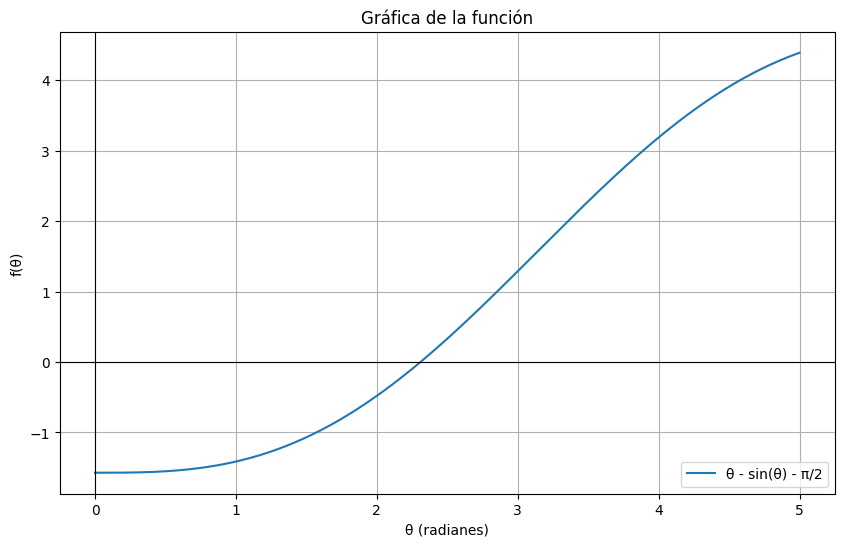

Bisección: θ = 2.309881460010729
Punto Fijo: θ = 2.309881460010057
Newton-Raphson: θ = 2.3098814600100575
Secante: θ = 2.3098814600100575

Resultados:
           Método       θ (radianes)
0       Bisección           2.309881
1      Punto Fijo  2.309881460010057
2  Newton-Raphson           2.309881
3         Secante           2.309881


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

# Función para la ecuación θ - sin(θ) - π/2
def f(theta):
  return theta - np.sin(theta) - np.pi / 2

# Gráfica de la función para encontrar una aproximación inicial
theta_values = np.linspace(0, 5, 400)
y_values = f(theta_values)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, y_values, label='θ - sin(θ) - π/2')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('θ (radianes)')
plt.ylabel('f(θ)')
plt.title('Gráfica de la función')
plt.grid(True)
plt.legend()
plt.show()

# Aproximación inicial (observando la gráfica)
initial_guess = 2.5

# Métodos Numéricos

# Método de Bisección
bisection_result = optimize.bisect(f, 2, 3)
print(f"Bisección: θ = {bisection_result}")

# Método de Punto Fijo (reorganizando la ecuación)
def g(theta):
  return np.sin(theta) + np.pi / 2

fixed_point_result = optimize.fixed_point(g, initial_guess)
print(f"Punto Fijo: θ = {fixed_point_result}") # Removed [0] from fixed_point_result

# Método de Newton-Raphson
newton_result = optimize.newton(f, initial_guess)
print(f"Newton-Raphson: θ = {newton_result}")

# Método de la Secante
secant_result = optimize.newton(f, initial_guess, fprime=None)
print(f"Secante: θ = {secant_result}")

# DataFrame para comparar resultados
results = pd.DataFrame({
    'Método': ['Bisección', 'Punto Fijo', 'Newton-Raphson', 'Secante'],
    'θ (radianes)': [bisection_result, fixed_point_result, newton_result, secant_result]
})

print("\nResultados:")
print(results)

# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


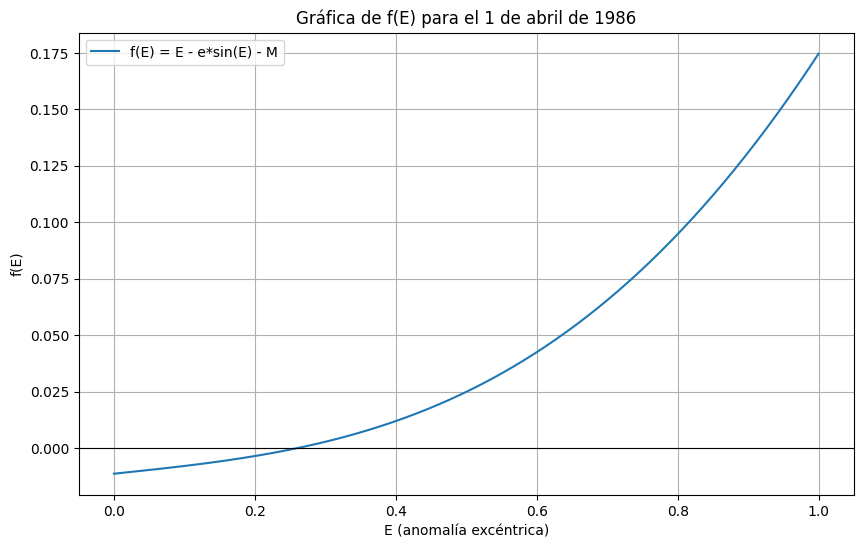

Anomalía excéntrica (E) el 1 de abril de 1986: 0.26103470838089937 radianes


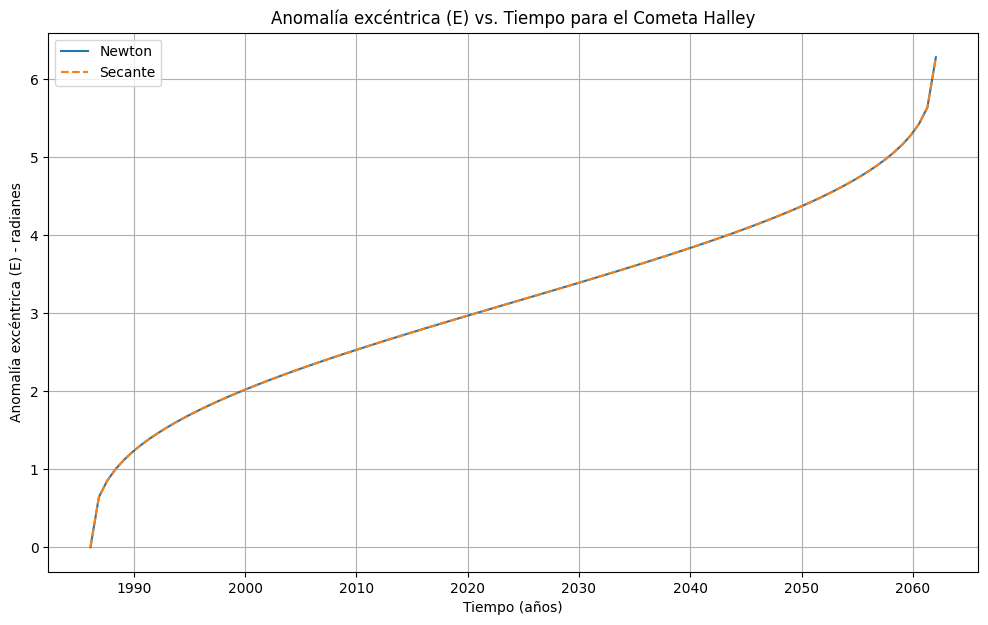


Resultados:
     Tiempo (años)  E (Newton)  E (Secante)
0        1986.1113    0.000000     0.000000
1        1986.8709    0.642133     0.642133
2        1987.6305    0.856463     0.856463
3        1988.3901    1.005053     1.005053
4        1989.1497    1.123388     1.123388
..             ...         ...          ...
96       2059.0329    5.159798     5.159798
97       2059.7925    5.278132     5.278132
98       2060.5521    5.426722     5.426722
99       2061.3117    5.641053     5.641053
100      2062.0713    6.283185     6.283185

[101 rows x 3 columns]


In [ ]:

# Datos del Cometa Halley
e = 0.9672671
T = 75.96  # años
t0 = 1986.1113  # años (9 de febrero de 1986)

# Función para calcular la anomalía media M
def calculate_M(t):
    return 2 * np.pi * (t - t0) / T

# Función f(E) = E - e*sin(E) - M
def f(E, M):
    return E - e * np.sin(E) - M

# 1. Encontrar E para el 1 de abril de 1986

# Calcular el tiempo transcurrido
t_april_1 = 1986 + (31 + 28 + 31 + 1) / 365.25  # 1 de abril de 1986
M_april_1 = calculate_M(t_april_1)

# Graficar f(E) para E en [0, 1]
E_values = np.linspace(0, 1, 400)
f_values = f(E_values, M_april_1)

plt.figure(figsize=(10, 6))
plt.plot(E_values, f_values, label='f(E) = E - e*sin(E) - M')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('E (anomalía excéntrica)')
plt.ylabel('f(E)')
plt.title('Gráfica de f(E) para el 1 de abril de 1986')
plt.grid(True)
plt.legend()
plt.show()

# Aproximación inicial (observando la gráfica)
initial_guess = 0.2

# Usar el método de Newton para encontrar E
E_april_1 = optimize.newton(lambda E: f(E, M_april_1), initial_guess)
print(f"Anomalía excéntrica (E) el 1 de abril de 1986: {E_april_1} radianes")

# 2. Graficar E(t) para un periodo usando Newton y Secante

# Calcular los tiempos para un periodo
delta_t = T / 100
times = [t0 + i * delta_t for i in range(101)]

# Listas para almacenar los valores de E
E_newton_values = []
E_secant_values = []

# Calcular E para cada tiempo usando Newton y Secante
initial_guess = 0  # E(t0) = 0
for t in times:
    M = calculate_M(t)
    E_newton = optimize.newton(lambda E: f(E, M), initial_guess)
    E_secant = optimize.newton(lambda E: f(E, M), initial_guess, fprime=None)  # Secante no necesita derivada
    E_newton_values.append(E_newton)
    E_secant_values.append(E_secant)
    initial_guess = E_newton  # Usar la solución anterior como aproximación inicial

# Graficar E(t)
plt.figure(figsize=(12, 7))
plt.plot(times, E_newton_values, label='Newton')
plt.plot(times, E_secant_values, label='Secante', linestyle='--')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalía excéntrica (E) - radianes')
plt.title('Anomalía excéntrica (E) vs. Tiempo para el Cometa Halley')
plt.grid(True)
plt.legend()
plt.show()

# DataFrame para comparar resultados
results = pd.DataFrame({
    'Tiempo (años)': times,
    'E (Newton)': E_newton_values,
    'E (Secante)': E_secant_values
})

print("\nResultados:")
print(results)

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

Secante (T=0.5): m = 0.9575
Newton-Raphson (T=0.5): m = 0.9575
Punto Fijo (T=0.5): m = 0.9575


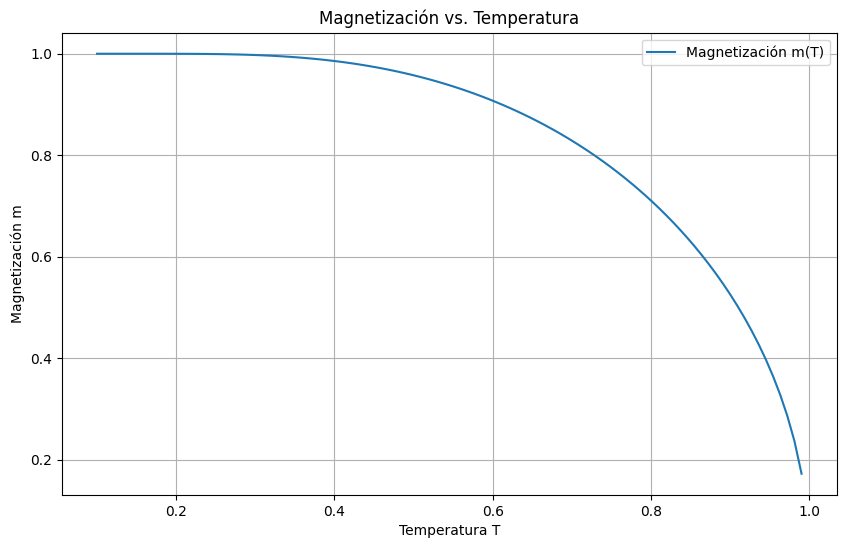


Resultados:
    Temperatura (T)  Magnetización (m)
0           0.10000           1.000000
1           0.10899           1.000000
2           0.11798           1.000000
3           0.12697           1.000000
4           0.13596           0.999999
..              ...                ...
95          0.95404           0.364440
96          0.96303           0.328074
97          0.97202           0.286465
98          0.98101           0.236864
99          0.99000           0.172511

[100 rows x 2 columns]


In [ ]:


# Función para la ecuación m - tanh(m/T)
def f(m, T):
    return m - np.tanh(m / T)

# 1. Encontrar m para T = 0.5

T = 0.5
initial_guess = 0.8  # Aproximación inicial

# Método de la Secante
secant_result = optimize.newton(lambda m: f(m, T), initial_guess, fprime=None)
print(f"Secante (T=0.5): m = {secant_result:.4f}")

# Método de Newton-Raphson
newton_result = optimize.newton(lambda m: f(m, T), initial_guess)
print(f"Newton-Raphson (T=0.5): m = {newton_result:.4f}")

# Método de Punto Fijo (reorganizando la ecuación)
def g(m, T):
    return np.tanh(m / T)

fixed_point_result = optimize.fixed_point(lambda m: g(m, T), initial_guess)
print(f"Punto Fijo (T=0.5): m = {fixed_point_result:.4f}")

# 2. Graficar m(T) vs. T usando la Secante

T_values = np.linspace(0.1, 0.99, 100)
m_secant_values = []

for T in T_values:
    initial_guess = 0.8  # Aproximación inicial para cada T
    m_secant = optimize.newton(lambda m: f(m, T), initial_guess, fprime=None)
    m_secant_values.append(m_secant)

# Graficar m(T) vs. T
plt.figure(figsize=(10, 6))
plt.plot(T_values, m_secant_values, label='Magnetización m(T)')
plt.xlabel('Temperatura T')
plt.ylabel('Magnetización m')
plt.title('Magnetización vs. Temperatura')
plt.grid(True)
plt.legend()
plt.show()

# DataFrame para comparar resultados
results = pd.DataFrame({
    'Temperatura (T)': T_values,
    'Magnetización (m)': m_secant_values
})

print("\nResultados:")
print(results)